In [37]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(context='notebook',style='whitegrid',palette='muted')

In [46]:
df=pd.read_csv('Titanic.csv', index_col='PassengerId')

In [47]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [49]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df.drop(columns='Cabin').isna().mean()

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [51]:
df.drop(columns='Cabin').dropna(subset=['Embarked'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [52]:
df['Age'] = df['Age'].round()

df['Pclass'] = df['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Embarked'] = df['Embarked'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Survived'] = df['Survived'].map({0:'Survived', 1:'Not Survived'})

df['Sex'] = df['Sex'].str.title()

categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked', 'Survived']
df[categorical_columns] = df[categorical_columns].astype('category')

In [53]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived'
]

df = df[cols]

In [54]:
df.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,NaN,7.2500,Survived
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,NaN,71.2833,Not Survived
3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,NaN,7.9250,Not Survived
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,NaN,53.1000,Not Survived
5,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,NaN,8.0500,Survived


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      891 non-null    object  
 1   Sex       891 non-null    category
 2   Age       714 non-null    float64 
 3   Parch     891 non-null    category
 4   SibSp     891 non-null    category
 5   Ticket    891 non-null    object  
 6   Pclass    891 non-null    category
 7   Embarked  0 non-null      category
 8   Fare      891 non-null    float64 
 9   Survived  891 non-null    category
dtypes: category(6), float64(2), object(2)
memory usage: 41.2+ KB


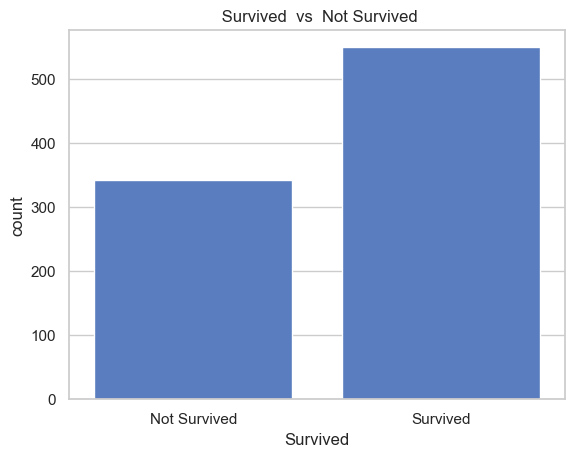

In [56]:
sns.countplot(data=df, x='Survived')
plt.title(' Survived  vs  Not Survived')
plt.show()

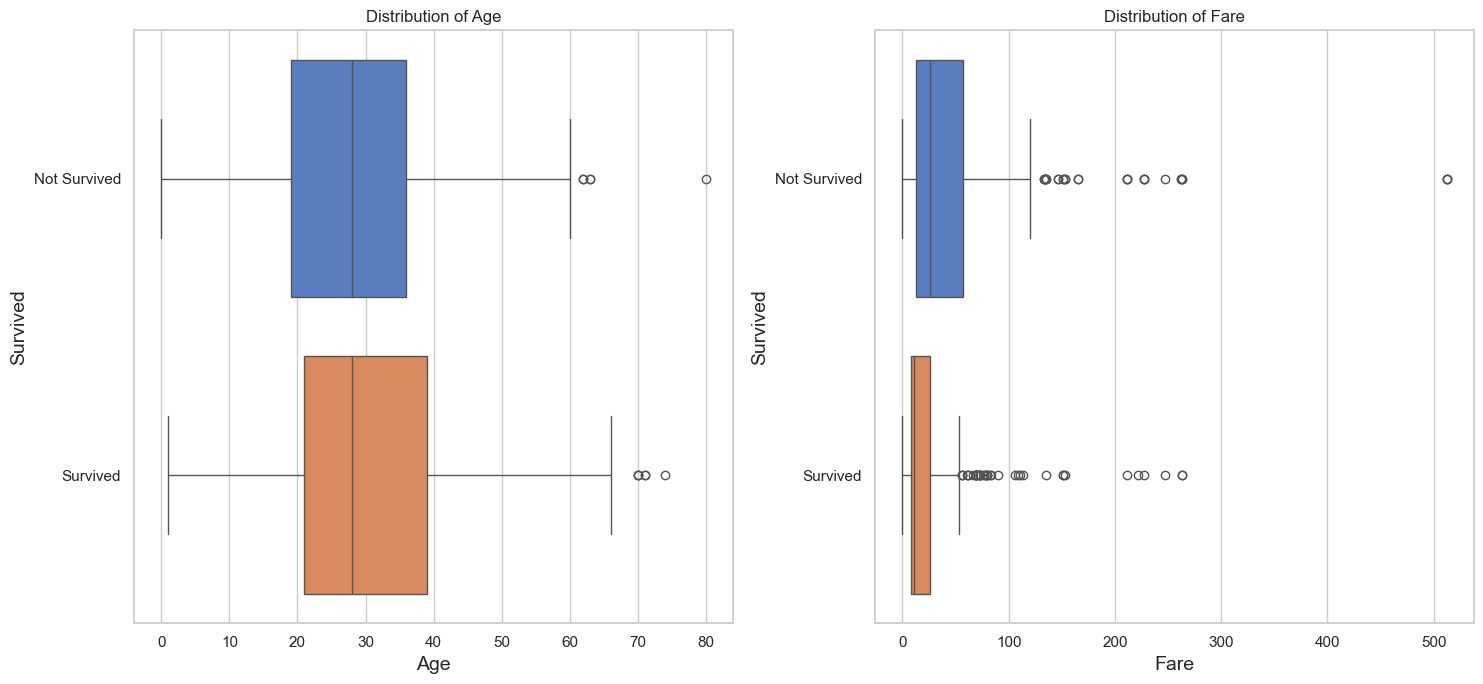

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(data=df, x='Age', y='Survived', ax=ax1, palette='muted')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Survived', fontsize=14)
ax1.set_title('Distribution of Age')

sns.boxplot(data=df, x='Fare', y='Survived', ax=ax2, palette='muted')
ax2.set_xlabel('Fare', fontsize=14)
ax2.set_ylabel('Survived', fontsize=14)
ax2.set_title('Distribution of Fare')

plt.tight_layout()
plt.show()

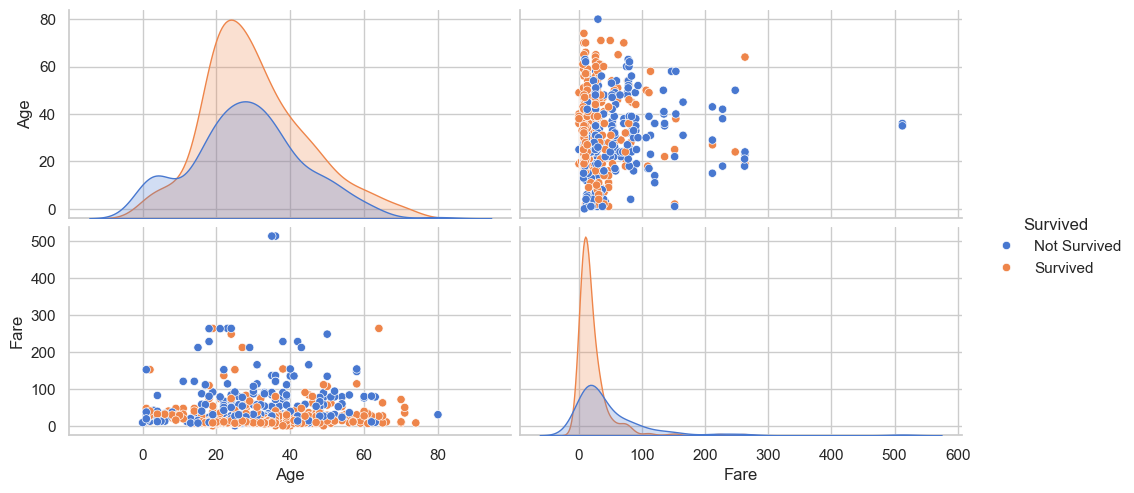

In [68]:
sns.pairplot(data=df, hue='Survived', aspect=2);

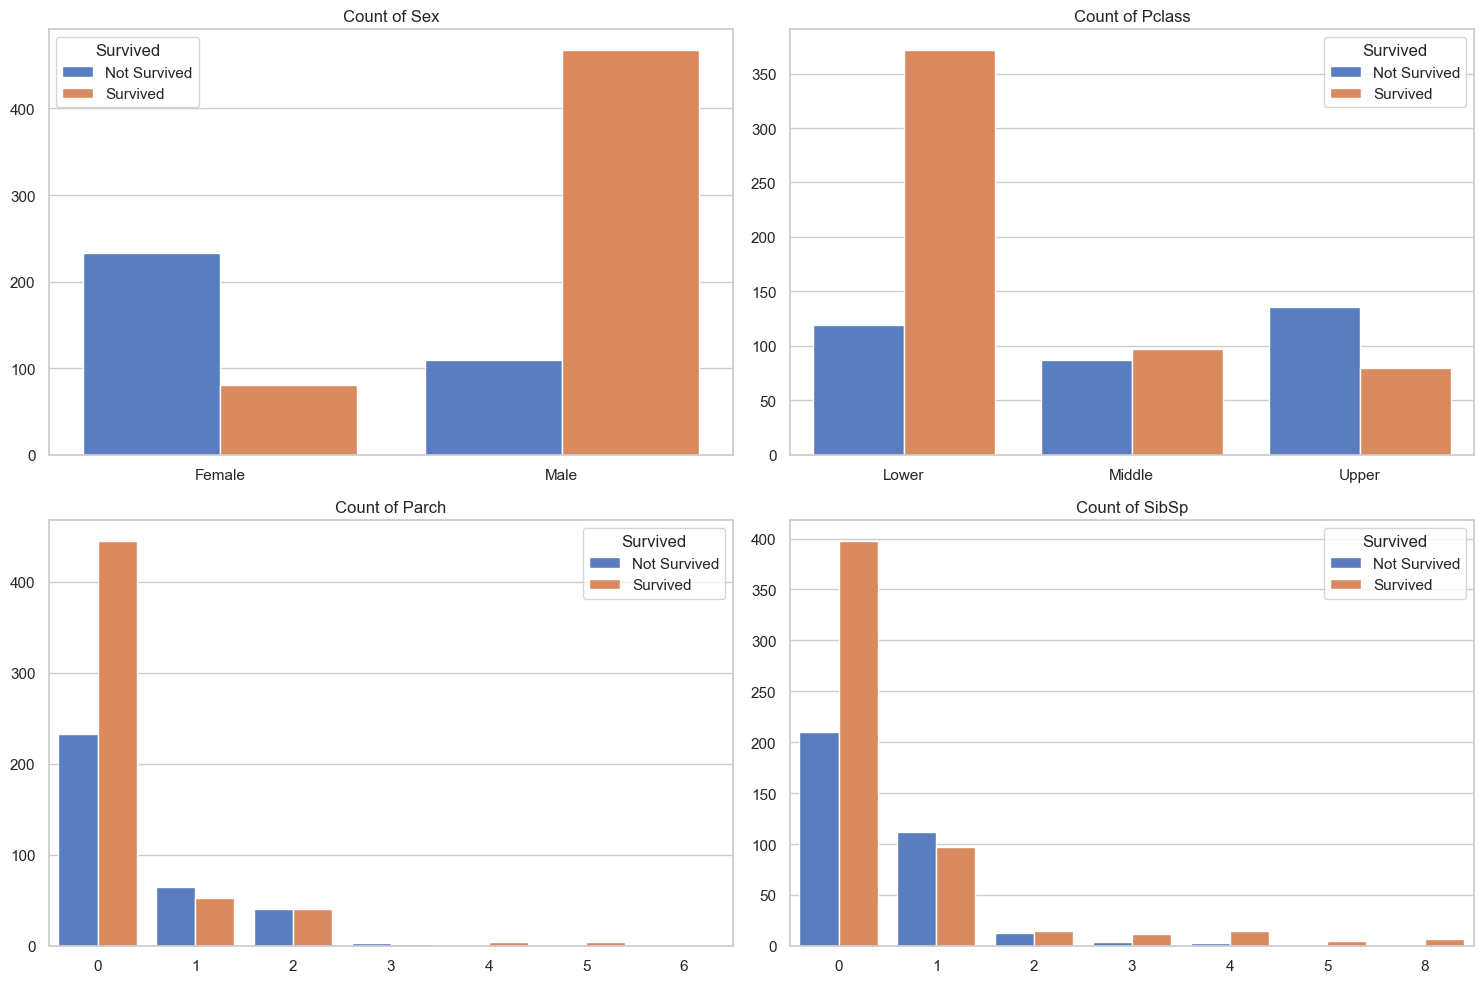

In [76]:
cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=df, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show();